# Derive a carene table from a buoyancy shape


In [1]:
from DAVE import *
from DAVE.jupyter import *

DAVEcore version = 2.0 from c:\python\miniconda3\envs\book\Lib\site-packages\DAVEcore.cp311-win_amd64.pyd
Blender found at: C:\Users\beneden\AppData\Local\Microsoft\WindowsApps\\blender-launcher.exe


In [2]:
s = Scene("cheetah.dave")  # use the Cheetah model

Loading c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\resources\cheetah.dave


c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\nodes.py:4631: UserWarning: BallastSystem.new_tank is outdated and may be removed in a future version.
  warn(


Have a look at the names of the nodes

No actors created for node Ballast_system
number of points changed, creating new


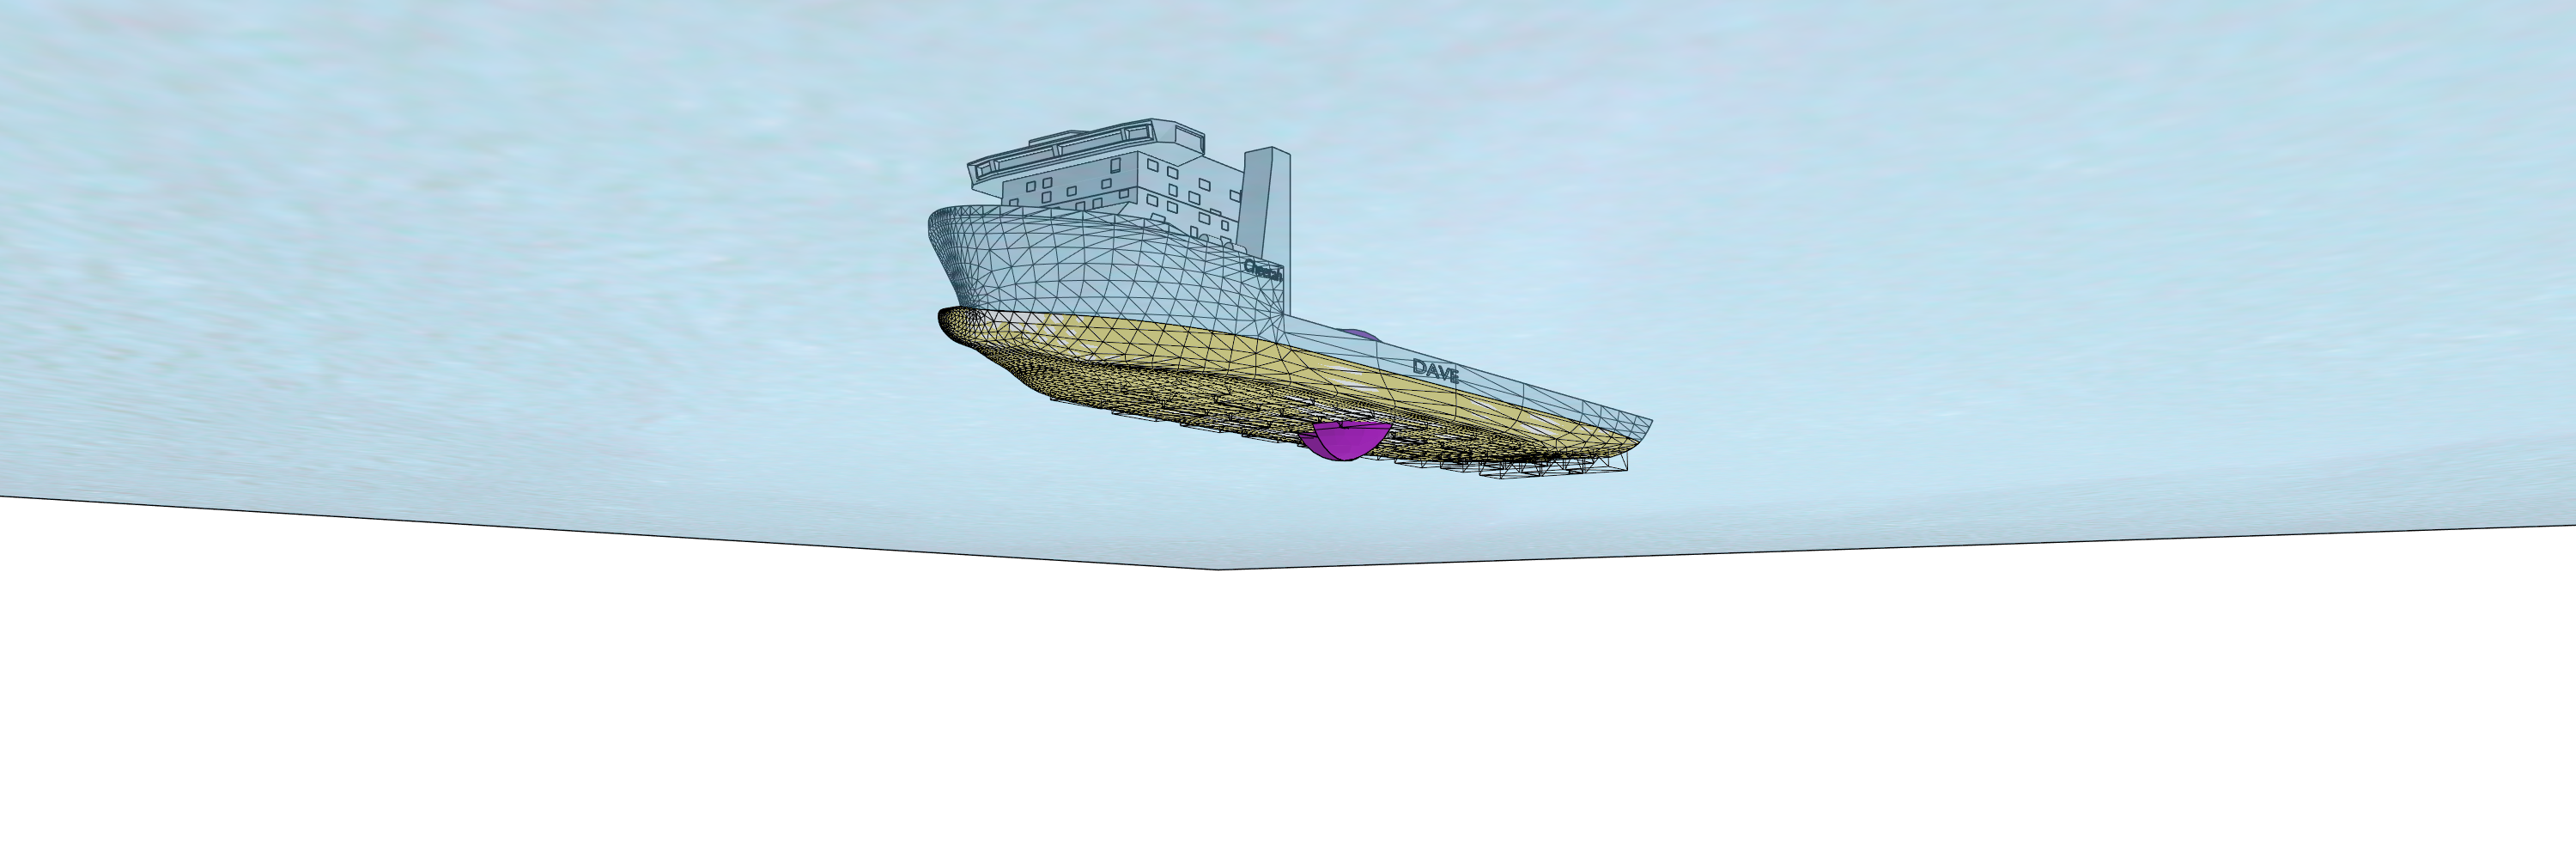

In [5]:
show(s, show_global = True, camera_pos = (377, 177, -50), lookat = (52, -52, 3), width=3000, height = 1000)

In [6]:
s.print_node_tree()

Cheetah [RigidBody]
 |-> DP reference point [Frame]
 |-> buoyancy [Buoyancy]
 |-> ps1 [Tank]
 |-> sb1 [Tank]
 |-> mid1 [Tank]
 |-> ps2 [Tank]
 |-> sb2 [Tank]
 |-> mid2 [Tank]
 |-> ps3 [Tank]
 |-> sb3 [Tank]
 |-> mid3 [Tank]
 |-> ps4 [Tank]
 |-> sb4 [Tank]
 |-> mid4 [Tank]
 |-> ps5 [Tank]
 |-> sb5 [Tank]
 |-> mid5 [Tank]
 |-> ps6 [Tank]
 |-> sb6 [Tank]
 |-> mid6 [Tank]
 |-> ps7 [Tank]
 |-> sb7 [Tank]
 |-> mid7 [Tank]
 |-> ps8 [Tank]
 |-> sb8 [Tank]
 |-> mid8 [Tank]
 |-> ps9 [Tank]
 |-> sb9 [Tank]
 |-> bow [Tank]
 |-> visual - vessel [Visual]
 |-> Wave Interaction draft 6.75 [WaveInteraction1]
 |-> Ballast_system [BallastSystem]
DP setpoint for cheetah [Frame]
DP springs cheetah [LC6d]


In [7]:
from DAVE.marine import carene_table

## Calculate the carene table

- The carene curve is requested based on the buoyancy node [Buoyancy], not the vessel node !
- The table is calculated numerically using a small displacement from the even-keel situation.

In [8]:
node = s['buoyancy']
table = carene_table(s, node);

0.005950999911874533
-0.25
-0.5
-0.75
-1.0
-1.25


c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:128: RuntimeWarning: invalid value encountered in divide
  cob_local = np.sum([np.array(node.cob_local) * node.displacement for node in n2], axis=0) / displacement_m3
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:129: RuntimeWarning: invalid value encountered in divide
  cob_global = np.sum([np.array(node.cob) * node.displacement for node in n2], axis=0) / displacement_m3
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:165: RuntimeWarning: invalid value encountered in divide
  new_cob_global = np.sum([np.array(node.cob) * node.displacement for node in n2], axis=0) / np.sum(
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:172: RuntimeWarning: invalid value encountered in divide
  new_cob_global = np.sum([np.array(node.cob) * node.displacement for node in n2], axis=0) / np.sum(


-1.5
-1.75
-2.0
-2.25
-2.5
-2.75
-3.0
-3.25
-3.5
-3.75
-4.0
-4.25
-4.5
-4.75
-5.0
-5.25
-5.5
-5.75
-6.0
-6.25
-6.5
-6.75
-7.0
-7.25
-7.5
-7.75
-8.0
-8.25
-8.5
-8.75
-9.0
-9.25
-9.5
-9.75
-10.0
-10.25
-10.5
-10.75
-11.0
-11.25
-11.5
-11.75
-12.0
-12.25
-12.5
-12.75
-13.0
-13.25
-13.5
-13.75
-14.0
-14.25
-14.5
-14.75
-15.0
-15.25
-15.5
-15.75
-16.0
-16.25
-16.5
-16.75
-17.0
-17.25
-17.5
-17.75
-18.0
-18.25
-18.5
-18.75
-19.0
-19.25
-19.5
-19.75
-20.0
-20.25
-20.5
-20.75
-21.0
-21.25
-21.5
-21.548954010009766


c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:141: UserWarning: Zero displacement change detected for vertical position of -21.549954010009767m
  warn(f'Zero displacement change detected for vertical position of {a.z}m')


In [9]:
table

,BM T [m],BM L [m],CoF x [m],CoF y [m],Awl [m2],Displacement [m3],CoB x [m],CoB y [m],CoB z [m]
Draft [m],,,,,,,,,
0.005951,NaN,NaN,NaN,NaN,8.211311,0.000000,NaN,NaN,NaN
-0.250000,549.000884,5942.565819,112.103608,7.784851e-07,6038.173587,1395.640155,111.616555,7.311428e-07,0.129644
-0.500000,318.382553,3736.669234,112.576878,7.746077e-07,6420.005125,2956.986482,112.066639,7.581174e-07,0.259864
-0.750000,214.740826,2708.765262,112.158916,7.381401e-07,6654.911794,4592.819177,112.173159,7.549822e-07,0.390179
-1.000000,162.153850,2159.894627,111.574458,7.204355e-07,6851.278205,6281.546409,112.097717,7.484993e-07,0.520681
...,...,...,...,...,...,...,...,...,...
-20.500000,0.097729,0.284728,206.281862,7.928139e-06,4.954338,116192.287353,112.797469,6.512415e-07,7.658785
-20.750000,0.005297,0.192928,206.286085,7.578735e-06,3.744253,116193.375239,112.798344,6.513071e-07,7.658906
-21.000000,0.003606,0.101255,206.255766,6.843373e-06,2.536219,116194.160860,112.798977,6.513546e-07,7.658996


## Plotting

First re-generate the table with a smaller set-size:

In [10]:
table = carene_table(s, node, stepsize=.1);

0.005950999911874533
-0.1
-0.2
-0.30000000000000004
-0.4
-0.5
-0.6000000000000001


c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:128: RuntimeWarning: invalid value encountered in divide
  cob_local = np.sum([np.array(node.cob_local) * node.displacement for node in n2], axis=0) / displacement_m3
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:129: RuntimeWarning: invalid value encountered in divide
  cob_global = np.sum([np.array(node.cob) * node.displacement for node in n2], axis=0) / displacement_m3
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:165: RuntimeWarning: invalid value encountered in divide
  new_cob_global = np.sum([np.array(node.cob) * node.displacement for node in n2], axis=0) / np.sum(
c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:172: RuntimeWarning: invalid value encountered in divide
  new_cob_global = np.sum([np.array(node.cob) * node.displacement for node in n2], axis=0) / np.sum(


-0.7000000000000001
-0.8
-0.9
-1.0
-1.1
-1.2000000000000002
-1.3
-1.4000000000000001
-1.5
-1.6
-1.7000000000000002
-1.8
-1.9000000000000001
-2.0
-2.1
-2.2
-2.3000000000000003
-2.4000000000000004
-2.5
-2.6
-2.7
-2.8000000000000003
-2.9000000000000004
-3.0
-3.1
-3.2
-3.3000000000000003
-3.4000000000000004
-3.5
-3.6
-3.7
-3.8000000000000003
-3.9000000000000004
-4.0
-4.1000000000000005
-4.2
-4.3
-4.4
-4.5
-4.6000000000000005
-4.7
-4.800000000000001
-4.9
-5.0
-5.1000000000000005
-5.2
-5.300000000000001
-5.4
-5.5
-5.6000000000000005
-5.7
-5.800000000000001
-5.9
-6.0
-6.1000000000000005
-6.2
-6.300000000000001
-6.4
-6.5
-6.6000000000000005
-6.7
-6.800000000000001
-6.9
-7.0
-7.1000000000000005
-7.2
-7.300000000000001
-7.4
-7.5
-7.6000000000000005
-7.7
-7.800000000000001
-7.9
-8.0
-8.1
-8.200000000000001
-8.3
-8.4
-8.5
-8.6
-8.700000000000001
-8.8
-8.9
-9.0
-9.1
-9.200000000000001
-9.3
-9.4
-9.5
-9.600000000000001
-9.700000000000001
-9.8
-9.9
-10.0
-10.100000000000001
-10.200000000000001
-10.3


c:\python\miniconda3\envs\book\Lib\site-packages\DAVE\marine.py:141: UserWarning: Zero displacement change detected for vertical position of -21.549954010009767m
  warn(f'Zero displacement change detected for vertical position of {a.z}m')


By default the table in indexed by draft. This means the plot methods will plot with draft on the x-axis:

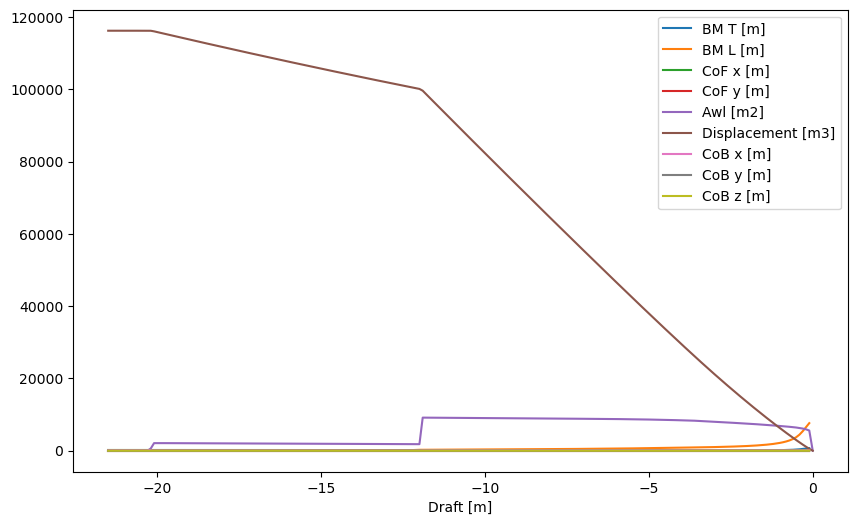

In [11]:
# Set matplotlib figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

table.plot();

To be able to plot with in the traditional way with the draft vertical we need to reset the index.
The x and y can then be specified by name

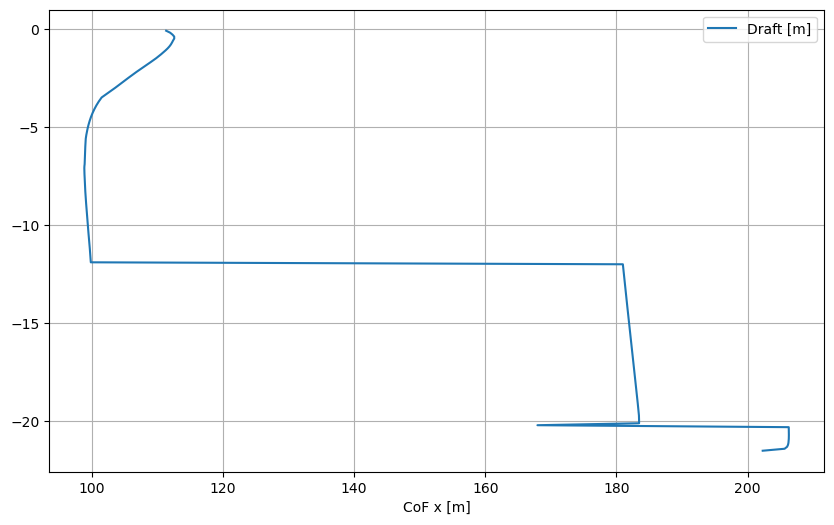

In [12]:
table = table.reset_index()
table.plot(x = 'CoF x [m]', y= 'Draft [m]')
plt.grid()

For plotting multiple lines in the same graph it is easiest to create the plots using matplotlib directly.

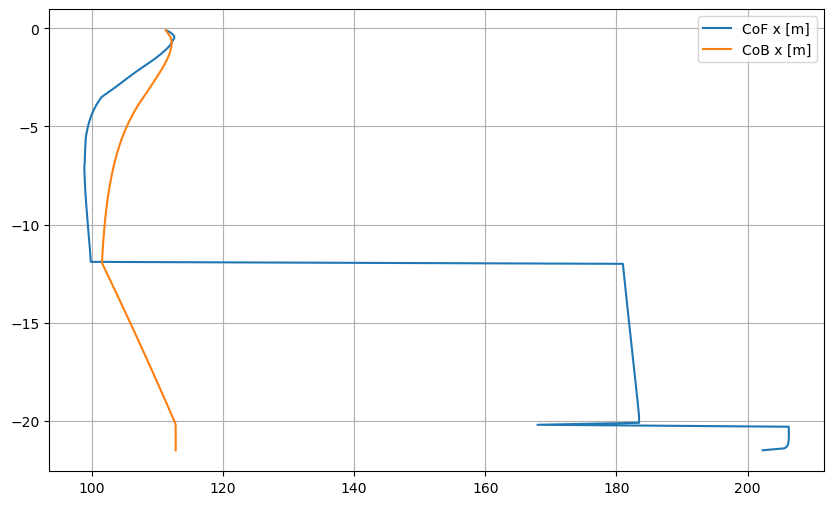

In [13]:
draft = table['Draft [m]']
cofx = table['CoF x [m]']
cobx = table['CoB x [m]']

plt.plot(cofx, draft,label='CoF x [m]')
plt.plot(cobx, draft,label='CoB x [m]')
plt.grid()
plt.legend();

Observe that the CoBx line is vertical at the point where CoBx = CoFx. Does that make sense?

-- done --